## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sys
import random
import networkx as nx
import sympy as sm
sm.init_printing(use_latex='mathjax')
%matplotlib inline

# The DBLP Publication Network

This dataset:

> http://konect.uni-koblenz.de/networks/dblp-author
  
contains a bipartite graph where the nodes are authors and academic papers. Each edge $(a,p)$ connects an author $a$ to a paper $p$. It contains 8.6 M edges (so it is a pretty large file). In this problem, we will analyze this data.

**Warmups:**

0. Find the minimum, maximum, and average, and standard deviation of the number of authors per paper.
0. Find the minimum, maximum, and average, and standard deviation of the number of papers per author.
0. Find the number of connected components of the network.
0. Pick several three metrics on graphs, evaluate them for this graph, and interpret their meanings. 

**Main question:**

Find the (not necessarily unique) author who has written the most papers. Call this author $X$. An author other than $X$ has an $X$-index of 1 if she has co-authored at least one paper with $X$. An author has an $X$-index of 2 if she does not have an $X$-index of 1, but has co-authored a paper with someone who has an $X$-index of 1. Similarly, you can define having an $X$-index of 3, 4, etc. 

Write a routine that produces the set of authors of a given index.

Make a plot with the $X$-index on the horizontal axis, and the number of authors with that $X$-index on the vertical axis. 

**Notes:** The network is encoded in the file above with two numbers per line separated by spaces. You will need to read that file using open and 'file.read' and turn it into a Python data string. Then use `split` to get a list of numbers. The numbers at even indices (starting at 0) are authors, and the numbers at odd indices are publications. Be careful not to do things that take a lot of operations or memory. The `networkx` library should work, as long as you don't try to draw the graph.

Also, you should develop your code using a smaller subset of the data so you do not spend a lot of time waiting. To facilitate this, I have put smaller subsets of the data here: 

  https://drive.google.com/drive/u/0/folders/1vwYKhqiD5GEFQi8WBMr63e2EUuk3DB22

The short version as 1,000 edges, the medium has 10,000 edges, the long version has 100,000 edges, and the "all" version has all the edges.

# Graphs and Linear Algebra

Recall that the adjacency matrix of an undirected graph has $A_{i,j} = 1$ if and only if nodes $i$ and $j$ are adjacent. Also , recall that a graph is **regular** with degree $k$ if every node has $k$ neighbors. We also say that the graph is $k$-regular. Finally, for shorthand, we say that the eigenvalues of a graph are the eigenvalues of its adjacency matrix.

**a)** Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in `networkx`, draw them, and find their adjacency matrices. These will be running examples for this problem.

**b)** Find the eigenvalues (of the adjacency matrices) of the three examples, along with the multiplicities of the eigenvalues.

**c)** Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$. 

**d)** Show that $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 

**e)** Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 

**f)** Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$. 

**g)** Show by construction that a $5$-regular graph with 16 vertices has least eigenvalue equal to $-2$. 

**h)** Show that the following graph, called the Petersen Graph, is $3$-regular by finding its eigenvalues. 

<img src="https://www.researchgate.net/profile/Paul_Wenger/publication/45714891/figure/fig1/AS:669480808091681@1536628071715/The-Petersen-graph.png" width=20%>

**i)** Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$. 

***
a) 

Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in `networkx`, draw them, and find their adjacency matrices.

C:\Users\victo\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


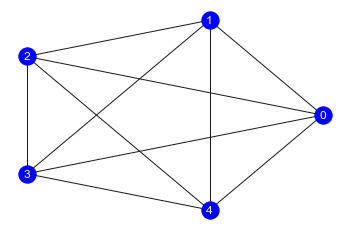

In [41]:
np.random.seed(42) # Set random seed for reproducibility 
G1 = nx.random_regular_graph(2, 5, seed=42) # 2-regular, 5 nodes

basic_graph,ax = plt.subplots(1,1)
nx.draw(G1, ax=ax, pos=nx.kamada_kawai_layout(G1),with_labels=True, node_color='blue',font_color="white")

In [40]:
# Generate the sparse adjacency matrices and covert to a full matrix representation
A1 = nx.adjacency_matrix(G1).todense()

# Convert to sympy matrices for futher analysis and nice outputs
A1 = sm.Matrix(A1)
print(A1 == A1.transpose()) # Symmetric Matrices
A1

True


⎡0  1  0  0  1⎤
⎢             ⎥
⎢1  0  1  0  0⎥
⎢             ⎥
⎢0  1  0  1  0⎥
⎢             ⎥
⎢0  0  1  0  1⎥
⎢             ⎥
⎣1  0  0  1  0⎦

b)

Find the eigenvalues of the three examples, along with the multiplicities of the eigenvalues.

In [22]:
# Can also use the faster built-in networkx function
# nx.adjacency_spectrum(G1)

A1.eigenvals(), A1.diagonalize()

⎛                                  ⎛                                          
⎜                                  ⎜⎡               1   √5              √5   1
⎜                                  ⎜⎢1     -1     - ─ + ──     -1     - ── - ─
⎜                                  ⎜⎢               2   2               2    2
⎜                                  ⎜⎢                                         
⎜                                  ⎜⎢    1   √5    1   √5    1   √5    1   √5 
⎜                                  ⎜⎢1   ─ - ──    ─ - ──    ─ + ──    ─ + ── 
⎜⎧        1   √5       √5   1   ⎫  ⎜⎢    2   2     2   2     2   2     2   2  
⎜⎨2: 1, - ─ + ──: 2, - ── - ─: 2⎬, ⎜⎢                                         
⎜⎩        2   2        2    2   ⎭  ⎜⎢     1   √5              √5   1          
⎜                                  ⎜⎢1  - ─ + ──     -1     - ── - ─     -1   
⎜                                  ⎜⎢     2   2               2    2          
⎜                                  ⎜⎢               

c)

Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$. 
***
*Proof Start:*

Because $G$ is a $k$-regular graph (we're assuming its also undirected), its adjacency matrix $A$ will be symmetric and have $k$ ones in any given row or column as a consequence of its definition.

$Ax = \lambda x = k x$

In [12]:
v = sm.Matrix([[1],[1],[1],[1],[1]]) # Vector of all 1s
A1 @ v # Multiplication with the Adjacency matrices to get an eigenvalue equation

⎡2⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣2⎦

d)

Show that $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 
***
Make use of the Perron-Forbenius theorm to solve this problem.

e)

Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 
***
*Proof Start:*

Consider the eignevalue equation $Ax = \lambda x$ and let $\max (x) = || x ||_{\infty} = x_i.$ We can reexpress the RHS as

$$\lambda x_i = \sum\limits_{j=1}^{n}A_{ij}x_j$$

which is just the matrix-vector multiplication of the $i^{th}$ entry of the product. This allows us to approximate:

$$\begin{align}
|\lambda x_i| &= |\sum\limits_{j=1}^{n}A_{ij}x_j| \\
&\leq 
\end{align}$$

f)

Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$.
***
*Proof Start:*

Observe that the $ij^{th}$ entry of the matrices are found by computing the inner products of the $i^{th}$ row of $A$ with the $j^{th}$ column of $\mathbb{1}_{nxn}$.

Alternatively, note that $AJ$ looks a lot like an eigenvalue problem (distribute $A$ to every column of $J$).

$AJ = [Aj_1, Aj_2, \dots, Aj_n]$

In [13]:
n = 5
J = np.ones((n,n))
# Multiply A1 and J to see what's going on

g)

Show by construction that there exists a $k$-regular graph with $n$ vertices has least eigenvalue equal to $-2$. (Pick $n$ and $k.$) 

In [14]:
G = nx.random_regular_graph(n,k)

# Algorithm idea:
# Loop thorugh different nx.random_regular_graph(n,k) until min eig val = -2
# Check with np.amin() this gets the smallest value in an array

h)

Show that the Petersen Graph, is $3$-regular by finding its eigenvalues. 
***
Spectral Graph Theory tells us that a graph with $n$ nodes is $k$-regular is equivalent to saying: 
- $AJ=kJ$ where $J=\mathbb{1}_{nxn}$
- $\sum\limits_{i=1}^{n}\lambda_i^2 = nk$.

In [15]:
Gp = nx.petersen_graph()
# Draw like we did earlier

i) 

Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$. 
***
*Proof (by construction):*

We will denote our nodes by $i\in\{1,2,\dots,n\}$.

Firstly, if $n = k+1$ then the graph in consideration is the complete graph of $n$ nodes, which is by definition regular.

The rest is somewhat difficult and not straightforward. Consider even and odd cases for k and construct the set of viable nodes.

I suggest writing some python code to build inutition about this problem. 

***

ALTERNATELY, play around with the fact that 

If the minimum degree of a vertex in a graph $G$ is $\delta \geq 2$, then there
exists a path in $G$ containing $\delta$ edges.


(False, False, False)

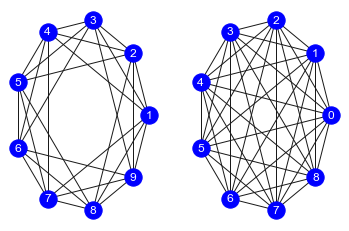

In [360]:
# The left is a sample output for n=9, k=6.
# The right is the complete graph

[ 4.  6.  8. 10. 12. 14. 16.] 

1 [3. 4. 5. 6. 7. 8. 9.]
2 [ 4.  5.  6.  7.  8.  9. 10.]
3 [ 5.  6.  7.  8.  9. 10.  1.]
4 [ 6.  7.  8.  9. 10.  1.  2.]
5 [ 7.  8.  9. 10.  1.  2.  3.]
6 [ 8.  9. 10.  1.  2.  3.  4.]
7 [ 9. 10.  1.  2.  3.  4.  5.]
8 [10.  1.  2.  3.  4.  5.  6.]
9 [1. 2. 3. 4. 5. 6. 7.]
10 [2. 3. 4. 5. 6. 7. 8.]


(False, False, False)

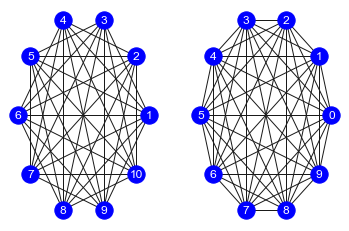

## Resources:

- https://networkx.github.io/documentation/stable/reference/generators.html
- http://www.cs.yale.edu/homes/spielman/561/2012/lect03-12.pdf
- http://web.cs.elte.hu/~lovasz/eigenvals-x.pdf
- https://orion.math.iastate.edu/butler/PDF/dissertation.pdf
- http://www.cs.utah.edu/~bhaskara/courses/x968/notes/lec5.pdf
- Spectral Graph Theory Lecture Notes: http://web.math.ucsb.edu/~padraic/ucsb_2014_15/ccs_discrete_s2015/ccs_discrete_s2015_lecture4.pdf
- Graphs with least eigenvalue −2: http://www-groups.mcs.st-andrews.ac.uk/~pjc/Teaching/MT5821/3/w4.pdf
- Graphs with least eigenvalue −2; a historical survey and recent developments in maximal exceptional graphs: https://core.ac.uk/download/pdf/82809187.pdf
- Existence of connected regular and nearly regular graphs: https://arxiv.org/pdf/1801.08345.pdf
- "Spectra of graphs" by Andries E. Brouwer, Willem H. Haemers pg.37: https://www.win.tue.nl/~aeb/2WF02/spectra.pdf

# Hallucinating the Constitution

Consider the constitution of the United States:

> https://www.usconstitution.net/const.txt .

This document contains upper- and lower-case letters, numbers, and basic punctuation. 

**One letter prediction:**

1. Find the set of all characters used in the document. Call the number of characters $n$. 
2. Create an $n \times n$ matrix whose $i,j$ entry is the probability that the next character is $j$ given that the current character is $i$. Estimate this probability by looking at all occurrences of character $i$ in the document and the number of times character $j$ immediately follows it. 
3. Simulate this system as a Markov chain that starts with an arbitrary capital letter and continues until it gets to a space. Produce $100$ random "words" this way. How many of them are actual words? Use a [Scrabble dictionary](https://scrabble.hasbro.com/en-us/tools#dictionary) if you are not certain whether a given sequence is a word. 

**Two letter prediction:**

1. Create an $n \times n \times n$ tensor whose $i,j,k$ entry is the probability that the next character is $k$ given that the current character is $j$ and the previous character is $i$. Use the document to empirically find these probabilities. 
2. Use this model to construct random words. 

**Sentence prediction:**

Do a one word prediction, but use all the unique *words* in the document. Hallucinate sentences. Consider a punctuation mark as a word. 

**Notes:** Use `open` and `file.read` to read in the file as a string. For the sentence. Use `replace` to add space before punctuation and then `split()` to turn the string into a list. Use a `DiGraph` from the `networkx` library to store the data. Note that you can make weighted edges by adding data to the edges, as in [this document](https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html).

In [16]:
import nltk # can use to check for words
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [18]:
file = open('const.txt',mode='r') # file data
text = file.read() # save the data as a string
file.close()

In [19]:
# Has the effect of separating  out punctuation marks that are directly following a word or next to each other
data = text.replace(".", " . ") \
           .replace(",", " , ") \
           .replace("-", " - ") \
           .replace(";", " ; ") \
           .replace(":", " : ").replace('\n', '').split() 

In [20]:
"House" in data

True

### Dictionary-Frequency approach:

In [ ]:
all_chars = # extract all characters are extracted from data

In [ ]:
unique_chars = list(set(all_chars))
chars = {}
for i in unique_chars:
    js = []
    for j in range(len(all_chars)-1):
        if i == all_chars[j]:     
            js.append(all_chars[j+1])
    chars[i] = js
chars

In [ ]:
def next_letter(key, dictionary):
    '''Assumes: key is a letter key in the dictionary  
    Returns: a single random choice of the values of key'''
    return np.choice(dictionary[key])

In [ ]:
unique_chars = list(set(data1))
print(unique_chars)

In [ ]:
#word generation using previous and succeding letters

punct = ['.', ',', ';', '-', ':', '(', ')', '"', "'", '[', ']', '/']
nums = ['1','2','3','4','5','6','7','8','9','0']

just_letters = [q for q in letter_list if q not in punct and q not in nums]
#a list of consisting of only letters and space breaks as they appear

pair_list = [''.join(just_letters[i:i+2]) for i in range(len(just_letters) - 1)] #the list of all letters as pairs
pair_set = list(set(pair_list)) #the set of unique letter-letter or letter-space pairs

char_pairs = {i:[pair_list[k][1] for k in range(len(pair_list) - 1) if i[1] == pair_list[k][0]] for i in pair_set}

def generate_from_pair(z, char_pairs):

    '''Generates a consecutive character pair using an input
    pair and probability dictionary.'''

    a = choice(char_pairs[z]) #storing the letter pair (i,j) which generates k

    return ''.join(z[-1]+a)
    #joins the k-letter to the second element of the iterated pair, which effectively returns (j,k)


def generate_words2(n, char_pairs):

    words = [] #empty set to initiate

    for _ in range(n):

        new_letter = ''; my_string = ''

        while not new_letter.istitle():
            new_letter = random.choice(pair_set)
            '''
            selecting randomly from a list containing all unique pairs 
            until one with a capital letter as its first element is found
            '''

        my_string += new_letter #saves the first generated pair

        while True:
            new_letter = generate_from_pair(new_letter, char_pairs)
            if new_letter[0] == ' ':
                break
            elif new_letter[-1] == ' ':
                break
            elif new_letter[-1].isupper():
                break
            else:
                my_string += new_letter[-1] 
                ''' to add only the second letter of the generated pair;
                this is the key to simulating the tensor'''
        words.append(my_string)
    return words

### networkx approach:

In [21]:
G = nx.DiGraph()

def populateEdges(g,dat):
    '''
    Assumes: dat contains a list of characters including spaces, but excluding '\n' in order of appearance in the Constitution
             G is an instantiated DiGraph
    Returns: G that has been populated with edges from the dat
    '''
    return None
    
# Make this into a function as above
previous = None
for current in data: # loop through every element of data
    print(current)
    if not previous:
        previous = current
    else:
        if G.has_edge(previous,current):
            G.get_edge_data(previous,current)["count"] += 1
        else:
            G.add_edge(previous,current,count=1)
        previous = current

Provided
by
USConstitution
.
net
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
[Note
:
Repealed
text
is
not
noted
in
this
version
.
Spelling
errors
have
been
corrected
in
this
version
.
For
an
uncorrected
,
annotated
version
of
the
Constitution
,
visit
http
:
//www
.
usconstitution
.
net/const
.
html
]
We
the
People
of
the
United
States
,
in
Order
to
form
a
more
perfect
Union
,
establish
Justice
,
insure
domestic
Tranquility
,
provide
for
the
common
defence
,
promote
the
general
Welfare
,
and
secure
the
Blessings
of
Liberty
to
ourselves
and
our
Posterity
,
do
ordain
and
establish
this
Constitution
for
the
United
States
of
America
.
Article
1
.
Section
1
All
legislative
Powers
herein
granted
shall
be
vested
in
a
Congress
of
the
United
States
,
which
shall
consist
of
a
Senate
and
House
of
Representatives
.
Section
2
The
House
of
Representatives
shall
be
composed
of
Members
chosen
every
second
Year
by
the
People
of
the
several
States
,
and
the
Electors
in
each
State
shall
ha

the
Appointment
of
the
Officers
,
and
the
Authority
of
training
the
Militia
according
to
the
discipline
prescribed
by
Congress
;
To
exercise
exclusive
Legislation
in
all
Cases
whatsoever
,
over
such
District
(not
exceeding
ten
Miles
square)
as
may
,
by
Cession
of
particular
States
,
and
the
acceptance
of
Congress
,
become
the
Seat
of
the
Government
of
the
United
States
,
and
to
exercise
like
Authority
over
all
Places
purchased
by
the
Consent
of
the
Legislature
of
the
State
in
which
the
Same
shall
be
,
for
the
Erection
of
Forts
,
Magazines
,
Arsenals
,
dock
-
Yards
,
and
other
needful
Buildings
;
And
To
make
all
Laws
which
shall
be
necessary
and
proper
for
carrying
into
Execution
the
foregoing
Powers
,
and
all
other
Powers
vested
by
this
Constitution
in
the
Government
of
the
United
States
,
or
in
any
Department
or
Officer
thereof
.
Section
9
The
Migration
or
Importation
of
such
Persons
as
any
of
the
States
now
existing
shall
think
proper
to
admit
,
shall
not
be
prohibited
by
the
Congres

of
different
States
;
between
Citizens
of
the
same
State
claiming
Lands
under
Grants
of
different
States
,
and
between
a
State
,
or
the
Citizens
thereof
,
and
foreign
States
,
Citizens
or
Subjects
.
In
all
Cases
affecting
Ambassadors
,
other
public
Ministers
and
Consuls
,
and
those
in
which
a
State
shall
be
Party
,
the
supreme
Court
shall
have
original
Jurisdiction
.
In
all
the
other
Cases
before
mentioned
,
the
supreme
Court
shall
have
appellate
Jurisdiction
,
both
as
to
Law
and
Fact
,
with
such
Exceptions
,
and
under
such
Regulations
as
the
Congress
shall
make
.
The
Trial
of
all
Crimes
,
except
in
Cases
of
Impeachment
,
shall
be
by
Jury
;
and
such
Trial
shall
be
held
in
the
State
where
the
said
Crimes
shall
have
been
committed
;
but
when
not
committed
within
any
State
,
the
Trial
shall
be
at
such
Place
or
Places
as
the
Congress
may
by
Law
have
directed
.
Section
3
Treason
against
the
United
States
,
shall
consist
only
in
levying
War
against
them
,
or
in
adhering
to
their
Enemies
,
gi

the
States
respectively
,
or
to
the
people
.
Amendment
11
The
Judicial
power
of
the
United
States
shall
not
be
construed
to
extend
to
any
suit
in
law
or
equity
,
commenced
or
prosecuted
against
one
of
the
United
States
by
Citizens
of
another
State
,
or
by
Citizens
or
Subjects
of
any
Foreign
State
.
Amendment
12
The
Electors
shall
meet
in
their
respective
states
,
and
vote
by
ballot
for
President
and
Vice
-
President
,
one
of
whom
,
at
least
,
shall
not
be
an
inhabitant
of
the
same
state
with
themselves
;
they
shall
name
in
their
ballots
the
person
voted
for
as
President
,
and
in
distinct
ballots
the
person
voted
for
as
Vice
-
President
,
and
they
shall
make
distinct
lists
of
all
persons
voted
for
as
President
,
and
of
all
persons
voted
for
as
Vice
-
President
and
of
the
number
of
votes
for
each
,
which
lists
they
shall
sign
and
certify
,
and
transmit
sealed
to
the
seat
of
the
government
of
the
United
States
,
directed
to
the
President
of
the
Senate
;
The
President
of
the
Senate
shall
,

resume
the
powers
and
duties
of
his
office
unless
the
Vice
President
and
a
majority
of
either
the
principal
officers
of
the
executive
department
or
of
such
other
body
as
Congress
may
by
law
provide
,
transmit
within
four
days
to
the
President
pro
tempore
of
the
Senate
and
the
Speaker
of
the
House
of
Representatives
their
written
declaration
that
the
President
is
unable
to
discharge
the
powers
and
duties
of
his
office
.
Thereupon
Congress
shall
decide
the
issue
,
assembling
within
forty
eight
hours
for
that
purpose
if
not
in
session
.
If
the
Congress
,
within
twenty
one
days
after
receipt
of
the
latter
written
declaration
,
or
,
if
Congress
is
not
in
session
,
within
twenty
one
days
after
Congress
is
required
to
assemble
,
determines
by
two
thirds
vote
of
both
Houses
that
the
President
is
unable
to
discharge
the
powers
and
duties
of
his
office
,
the
Vice
President
shall
continue
to
discharge
the
same
as
Acting
President
;
otherwise
,
the
President
shall
resume
the
powers
and
duties
of
h

In [7]:
[v for v in G.neighbors("Qualifications")] # the previous word and the next word following "Qualifications"

['requisite', 'of']

In [42]:
G.nodes

NodeView(('Provided', 'by', 'USConstitution', '.', 'net', '-', '[Note', ':', 'Repealed', 'text', 'is', 'not', 'noted', 'in', 'this', 'version', 'Spelling', 'errors', 'have', 'been', 'corrected', 'For', 'an', 'uncorrected', ',', 'annotated', 'of', 'the', 'Constitution', 'visit', 'http', '//www', 'usconstitution', 'net/const', 'html', ']', 'We', 'People', 'United', 'States', 'Order', 'to', 'form', 'a', 'more', 'perfect', 'Union', 'establish', 'Justice', 'insure', 'domestic', 'Tranquility', 'provide', 'for', 'common', 'defence', 'promote', 'general', 'Welfare', 'and', 'secure', 'Blessings', 'Liberty', 'ourselves', 'our', 'Posterity', 'do', 'ordain', 'America', 'Article', '1', 'Section', 'All', 'legislative', 'Powers', 'herein', 'granted', 'shall', 'be', 'vested', 'Congress', 'which', 'consist', 'Senate', 'House', 'Representatives', '2', 'The', 'composed', 'Members', 'chosen', 'every', 'second', 'Year', 'several', 'Electors', 'each', 'State', 'Qualifications', 'requisite', 'most', 'numerou

In [43]:
G.edges

OutEdgeView([('Provided', 'by'), ('Provided', 'that'), ('Provided', ','), ('by', 'USConstitution'), ('by', 'the'), ('by', 'adding'), ('by', 'Law'), ('by', 'Resignation'), ('by', 'which'), ('by', 'two'), ('by', 'Yeas'), ('by', 'their'), ('by', 'him'), ('by', 'securing'), ('by', 'Congress'), ('by', 'Cession'), ('by', 'this'), ('by', 'any'), ('by', 'Ballot'), ('by', 'States'), ('by', 'and'), ('by', 'granting'), ('by', 'Jury'), ('by', 'general'), ('by', 'Conventions'), ('by', 'Oath'), ('by', 'law'), ('by', 'an'), ('by', 'jury'), ('by', 'a'), ('by', 'it'), ('by', 'Citizens'), ('by', 'ballot'), ('by', 'states'), ('by', 'appropriate'), ('by', 'election'), ('by', 'conventions'), ('by', 'reason'), ('USConstitution', '.'), ('.', 'net'), ('.', 'Spelling'), ('.', 'For'), ('.', 'usconstitution'), ('.', 'net/const'), ('.', 'html'), ('.', 'Article'), ('.', 'Section'), ('.', 'No'), ('.', 'Representatives'), ('.', 'The'), ('.', 'When'), ('.', 'Immediately'), ('.', 'Judgment'), ('.', 'Each'), ('.', 'Nei

In [ ]:
# Some Tests

# G.edges # Check out the set of edges in the graph
# [v for v in G.neighbors("Qualifications")] # the previous word and the next word following "Qualifications"
[(u,v,d) for (u,v,d) in G.edges(data=True) if u == "President"] # If True, return edge attribute dict in 3-tuple (u, v, ddict). If False, return 2-tuple (u, v).

In [ ]:
def hallucinate(word,g):
    '''
    Assumes: word is a node in g, 
             g has been populated with nodes and edges
    Returns: a 100 word array (of mostly nonsense) 
    '''
    sentence = [word] # Our initialized list of words
    word_count = len(sentence)
    while word_count < 101: # Keep appending words to sentece until a period is reached and 100 words made
        edges = # Return edge attribute dict in 3-tuple (u, v, ddict).
        total = sum([d["count"] for (u,v,d) in edges]) # total edges connected to current 'word'
        r = # Generate a uniform probability
        i = 0 # intialize the index
        s = # initialize the probability using:  edges[i][2]["count"] and a normalization factor
        while r > s: # while some uniform random probability > s
            i += 1 # increment the index
            s += # Add the current probability to past:  edges[i][2]["count"] and a normalization factor
                 # This is to accumulate probability for 'word' to transition to edges[i][1]
        word = edges[i][1]
        sentence.append(word) # append next word to sentence
    return sentence # is an array

In [9]:
# Check for valid English words
count = 0 #valid word count
english = set(w.lower() for w in nltk.corpus.words.words())
valid = []
# loop through word in sentence:
   # Check if word in in english:
        # If so, increase count
        

The above approach will works well with the 1 letter and 1 word prediction. For 2 letter prediction, we'll need to make some adjustments.

The tensor is implicitly defined in the graph. The fragment `[(u,v,d) for (u,v,d) in Grph.edges(data=True) if u == word]` reveals all the edges between the `ij`$^{th}$ character pair in the Consititution to a next character `k`, and their frequency of occcurance. From this we can calculate the empirical probability of transition from `ij` to `ijk` as

$$
P[ijk] = \frac{\text{frequency of a path from $ij$ to $k$ in text}}{\text{# of edges out of node $ij$}}
$$

i.e. `s = edges[i][2]["count"] / sum([d["count"] for (u,v,d) in edges])`.

### Some Related Resources:

- https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
- https://jeremykun.com/2015/04/06/markov-chain-monte-carlo-without-all-the-bullshit/
- Introduction to Markov Chain Monte Carlo: https://www.mcmchandbook.net/HandbookChapter1.pdf
- The Markov Chain Monte Carlo Revolution: https://math.uchicago.edu/~shmuel/Network-course-readings/MCMCRev.pdf
- http://www2.stat.duke.edu/~rcs46/lecturesModernBayes/601-module6-markov/markov-chain-monte-carlo.pdf

# Fourier Meets Neural Networks

An approximation to a Fourier Series can be cast as a neural network where the input is a single number, which then fans out a number of neurons that output $\sin(2 \pi k x)$ and $\cos(2 \pi k x)$, for $k = 0 \dots n-1$. Those neurons are then multiplied by weights and summed together, which can be accomplished with a fully connected layer with $2n$ inputs and one output. Graphically, this looks like the following:

<img src="https://raw.githubusercontent.com/klavins/EE502P/master/images/fourier-network.jpeg" width=60%>

a) Write a `pytorch` model whose weights form the coefficients of a Fourier Series. The number of terms in the series should be an input to the constructor. Initially, the weights should be random. 

b) Create a `make_data` function that returns a square wave evaluated on a random list of numbers between 0 and 1. You will use this to train and evaluate your network. 

c) Use `MSELoss` and the `Adam` optimizer to learn the weights for the model so that it approximates the square wave using $n$ equal to $10$, $20$ and then $100$. How close are the learned weights to the optimal weights?

d) Repeat the problem, but instead of using sines and cosines, use a sum of $n$ radial basis functions. That is, approximate the function by

$$
\hat f(x) = \sum_{i=1}^n r \left (x-\frac{i}{n} \right )
$$

where 

$$
r(x) = e^{-ax^2}
$$

and $a = 100$. 

Notes: You will need to understand `pytorch` tensors fairly well before attempting this problem. This [tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py) and these [docs](https://pytorch.org/docs/stable/tensors.html) are indispensable. 

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

# The Problems

0. The DBLP Publication Network
0. Graphs and Linear Algebra
0. Hallucinating the Constitution
0. Fourier meets Neural Networks
0. DIfferential Equations and Neural Networks